# Prophet - predição de vendas no varejo.

<img src="https://i.imgur.com/Hi7XNrM.png" />

## Facebook PROPHET

A ferramenta visa contribuir para problemas de geração de previsões e cenários futuros para séries temporais. Veja as características do Prophet (em que ele brilha, segundo o site):
* Observações horárias, diárias ou semanais com pelo menos alguns meses (preferivelmente um ano) de histórico.
* Feriados importantes que ocorrem em intervalos irregulares que são conhecidos antecipadamente (por exemplo, o Super Bowl).
* Um número razoável de observações ausentes ou grandes outliers,
* mudanças históricas de tendência, por exemplo, devido a lançamentos de produtos ou alterações no registro.
* Tendências que são curvas de crescimento não lineares, em que uma tendência atinge um limite natural ou satura.

A ideia de oferecer uma ferramenta para forecast com menor esforço está tornando o Prophet largamente investigado.

Nesse projeto vamos testa a eficácia dele, usaremos um dataset simples para tal:

In [13]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [14]:
%time sales_df = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Projeto_TimeSires_Phophet/example_retail_sales.csv', sep = ',', encoding  = 'ISO-8859-1',  index_col='Date', parse_dates=True)

Wall time: 6 ms


In [15]:
sales_df.head()

,Sales
Date,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


In [16]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 1992-01-01 to 2016-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   293 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


**Esse dataset e bem pequeno e foi ajustado propositalmente testas modelos preditores que usem séries temporais.**

## Preparação dos dados para o Prophet

In [17]:
df = sales_df.reset_index()

In [18]:
df.head()

,Date,Sales
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


*Vamos renomear as colunas.*

*O Prophet exige que os dados estajão organizados como 'ds' (datas) e 'y' (valor).*

In [19]:
df=df.rename(columns={'Date':'ds', 'Sales':'y'})

In [20]:
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


*Plot dos dados*

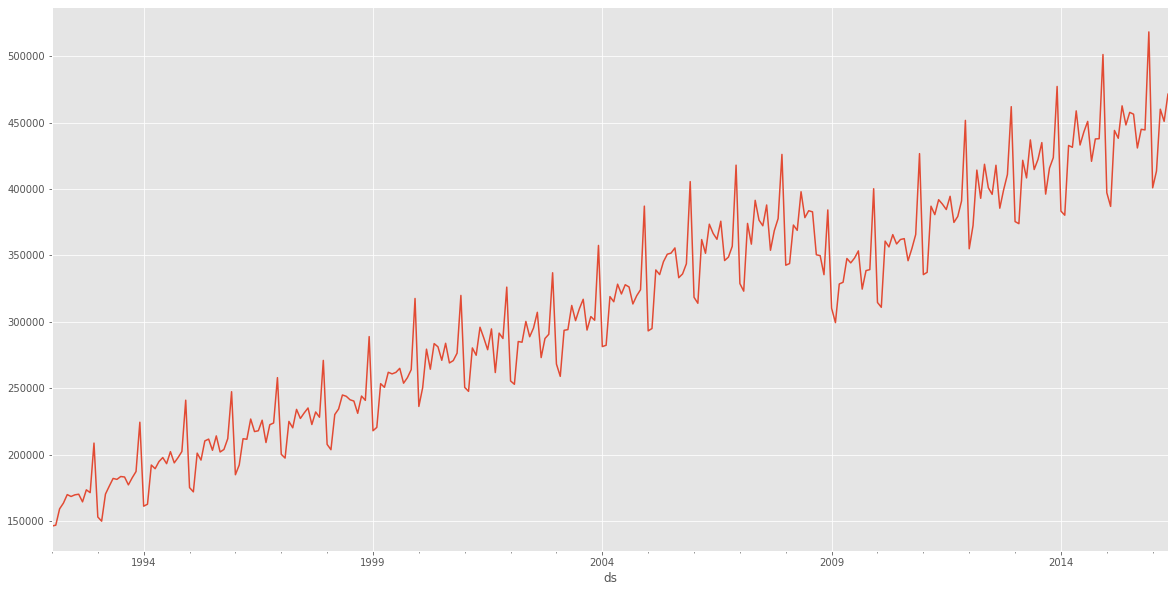

In [21]:
df.set_index('ds').y.plot()

*Transformação dos dados aplicando a função log do numpy*

In [22]:
df['y'] = np.log(df['y'])

In [23]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


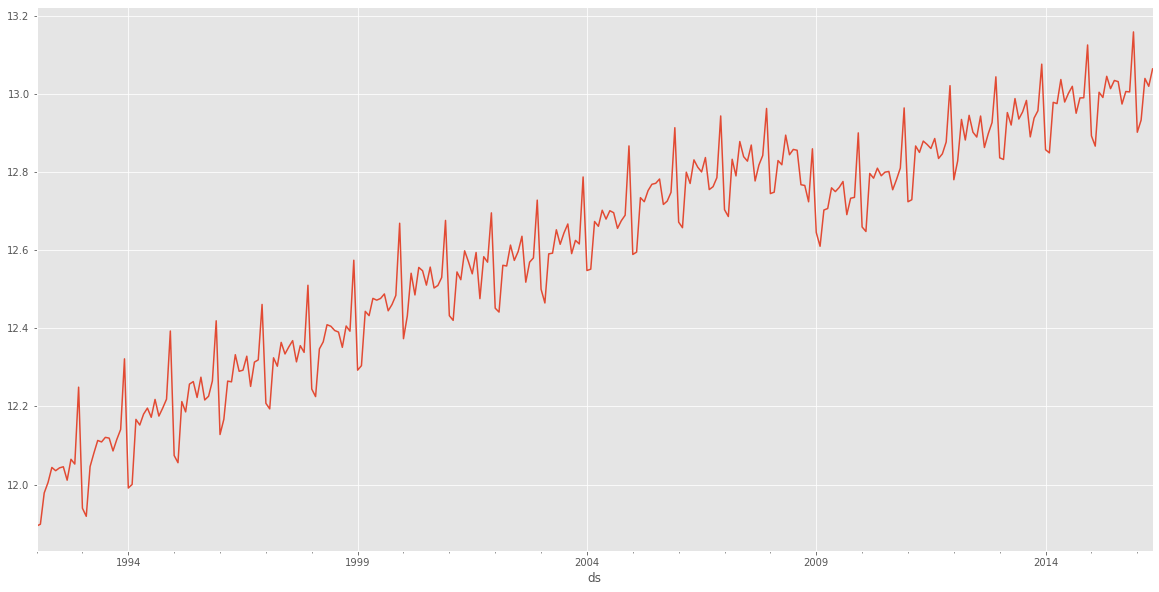

In [24]:
df.set_index('ds').y.plot()

# Execução do Prophet

*A ferramenta automaticamente seleciona uma sazonalidade adequada*

In [25]:
model = Prophet()
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


*Montagem do dataframe que irá receber os dados das predições.*

In [27]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [28]:
future.tail()

,ds
312,2017-12-31
313,2018-01-31
314,2018-02-28
315,2018-03-31
316,2018-04-30


*Execução da predição do modelo instanciado.*

In [29]:
forecast = model.predict(future)

*Resultado da execução:*

In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
312,2017-12-31,13.098738,12.925904,13.026797,13.048307,13.146196,-0.120683,-0.120683,-0.120683,-0.120683,-0.120683,-0.120683,0.0,0.0,0.0,12.978056
313,2018-01-31,13.101735,12.950562,13.064513,13.047299,13.154517,-0.091193,-0.091193,-0.091193,-0.091193,-0.091193,-0.091193,0.0,0.0,0.0,13.010542
314,2018-02-28,13.104441,13.037950,13.157961,13.046162,13.160433,-0.006330,-0.006330,-0.006330,-0.006330,-0.006330,-0.006330,0.0,0.0,0.0,13.098111
315,2018-03-31,13.107438,13.023937,13.151873,13.045099,13.167698,-0.018631,-0.018631,-0.018631,-0.018631,-0.018631,-0.018631,0.0,0.0,0.0,13.088807
316,2018-04-30,13.110338,13.074308,13.206960,13.044651,13.176382,0.030753,0.030753,0.030753,0.030753,0.030753,0.030753,0.0,0.0,0.0,13.141091


*Seleção dos dados específicos das predições da série temporal:*

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1992-01-01,11.874770,11.855299,11.894455
1,1992-02-01,11.890987,11.870395,11.909641
2,1992-03-01,12.011059,11.990992,12.032256
3,1992-04-01,11.999279,11.979463,12.017462
4,1992-05-01,12.054905,12.034513,12.075108


In [35]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
312,2017-12-31,12.978056,12.925904,13.026797
313,2018-01-31,13.010542,12.950562,13.064513
314,2018-02-28,13.098111,13.037950,13.157961
315,2018-03-31,13.088807,13.023937,13.151873
316,2018-04-30,13.141091,13.074308,13.206960


# Plot dos resultados

*Prophet tem uma função embarcada que já faz o desenho do gráfico - plot.*

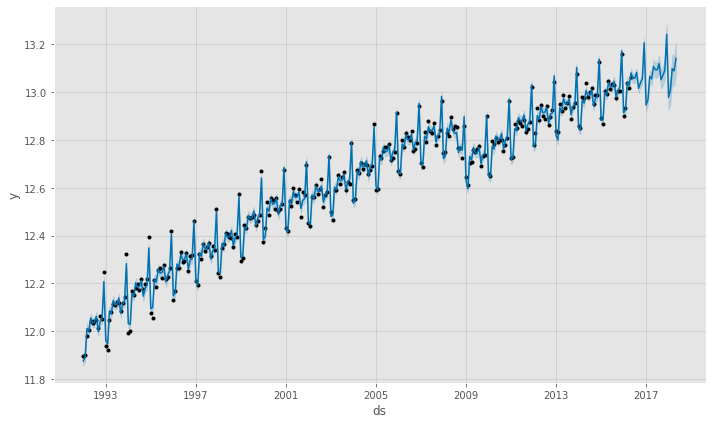

In [36]:
model.plot(forecast);

*Sazonalidade do dados.*

# Montando a visualização no formato original dos dados

*Equalização dos índices para```ds```*

In [37]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

*Junção dos dados originais e do forecast*

In [38]:
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

*Observação: os dados da predição ainda estão em valores relativos à transformação logarítimica que realizamos.*

In [40]:
viz_df.head()

,Sales,yhat,yhat_lower,yhat_upper
1992-01-01,146376.0,11.874770,11.855299,11.894455
1992-02-01,147079.0,11.890987,11.870395,11.909641
1992-03-01,159336.0,12.011059,11.990992,12.032256
1992-04-01,163669.0,11.999279,11.979463,12.017462
1992-05-01,170068.0,12.054905,12.034513,12.075108


*retornando os dados de log para a escala original*

In [41]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [42]:
viz_df.head()

,Sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
1992-01-01,146376.0,11.874770,11.855299,11.894455,143597.625778
1992-02-01,147079.0,11.890987,11.870395,11.909641,145945.223222
1992-03-01,159336.0,12.011059,11.990992,12.032256,164564.714316
1992-04-01,163669.0,11.999279,11.979463,12.017462,162637.539387
1992-05-01,170068.0,12.054905,12.034513,12.075108,171940.663211


*Visualização dos dados das vendas e do yhat restaurado ao valor original*

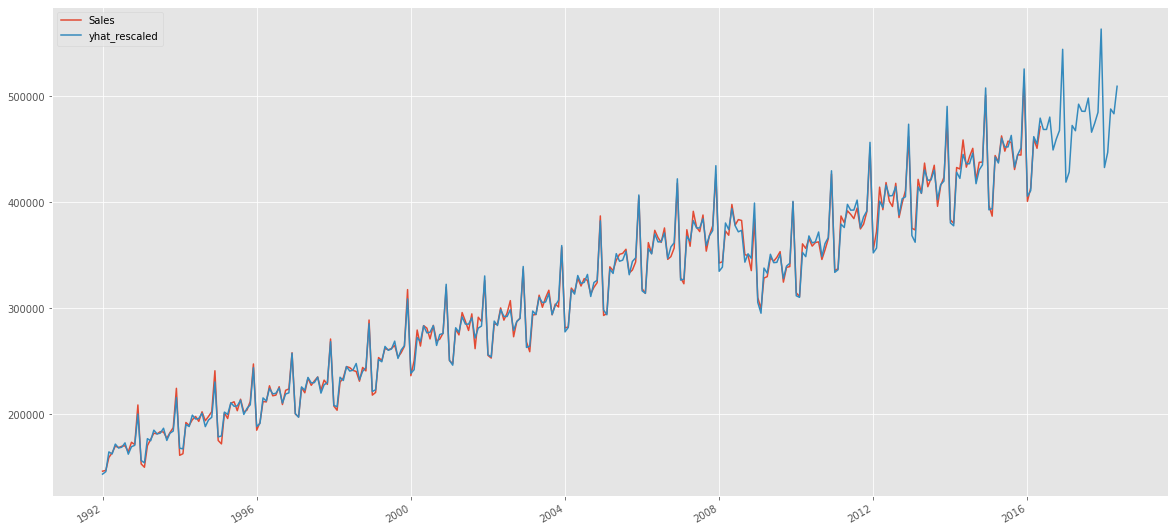

In [44]:
viz_df[['Sales', 'yhat_rescaled']].plot()

*Vamos utilizar a data como índice:*

In [45]:
sales_df.index = pd.to_datetime(sales_df.index)

*Seleciona a penúltima data:*

In [46]:
connect_date = sales_df.index[-2]

*Critério com os índices maiores que a penúltima:*

In [47]:
mask = (forecast.index > connect_date)

*Seleção dos dados:*

In [48]:
predict_df = forecast.loc[mask]

*O predict_df terá somente os valores abaixo que forem True:*

In [49]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [50]:
predict_df

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2016-05-01,13.039870,13.060703,13.100113,13.039870,13.039870,0.040429,0.040429,0.040429,0.040429,0.040429,0.040429,0.0,0.0,0.0,13.080299
2016-05-31,13.042770,13.037929,13.077601,13.042770,13.042770,0.014957,0.014957,0.014957,0.014957,0.014957,0.014957,0.0,0.0,0.0,13.057727
2016-06-30,13.045670,13.036762,13.077351,13.045670,13.045670,0.012030,0.012030,0.012030,0.012030,0.012030,0.012030,0.0,0.0,0.0,13.057700
2016-07-31,13.048666,13.061373,13.101157,13.048665,13.048690,0.033691,0.033691,0.033691,0.033691,0.033691,0.033691,0.0,0.0,0.0,13.082357
2016-08-31,13.051663,12.995511,13.036417,13.050672,13.052280,-0.036116,-0.036116,-0.036116,-0.036116,-0.036116,-0.036116,0.0,0.0,0.0,13.015546
2016-09-30,13.054563,13.016683,13.057108,13.052134,13.056371,-0.016701,-0.016701,-0.016701,-0.016701,-0.016701,-0.016701,0.0,0.0,0.0,13.037862
2016-10-31,13.057559,13.034205,13.076777,13.053608,13.060575,-0.001868,-0.001868,-0.001868,-0.001868,-0.001868,-0.001868,0.0,0.0,0.0,13.055691
2016-11-30,13.060459,13.185126,13.230055,13.054617,13.065897,0.146793,0.146793,0.146793,0.146793,0.146793,0.146793,0.0,0.0,0.0,13.207252
2016-12-31,13.063456,12.921887,12.968089,13.054594,13.070871,-0.117785,-0.117785,-0.117785,-0.117785,-0.117785,-0.117785,0.0,0.0,0.0,12.945671


*Construção do DataFrame para a visualização.*

In [52]:
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df

,Sales,yhat,yhat_lower,yhat_upper
1992-01-01,146376.0,NaN,NaN,NaN
1992-02-01,147079.0,NaN,NaN,NaN
1992-03-01,159336.0,NaN,NaN,NaN
1992-04-01,163669.0,NaN,NaN,NaN
1992-05-01,170068.0,NaN,NaN,NaN
...,...,...,...,...
2017-12-31,NaN,12.978056,12.925904,13.026797
2018-01-31,NaN,13.010542,12.950562,13.064513
2018-02-28,NaN,13.098111,13.037950,13.157961
2018-03-31,NaN,13.088807,13.023937,13.151873


*Adição da coluna com o yhat original:*

In [54]:
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

## Visualizaçao Final

Text(0.5, 0, 'Data')

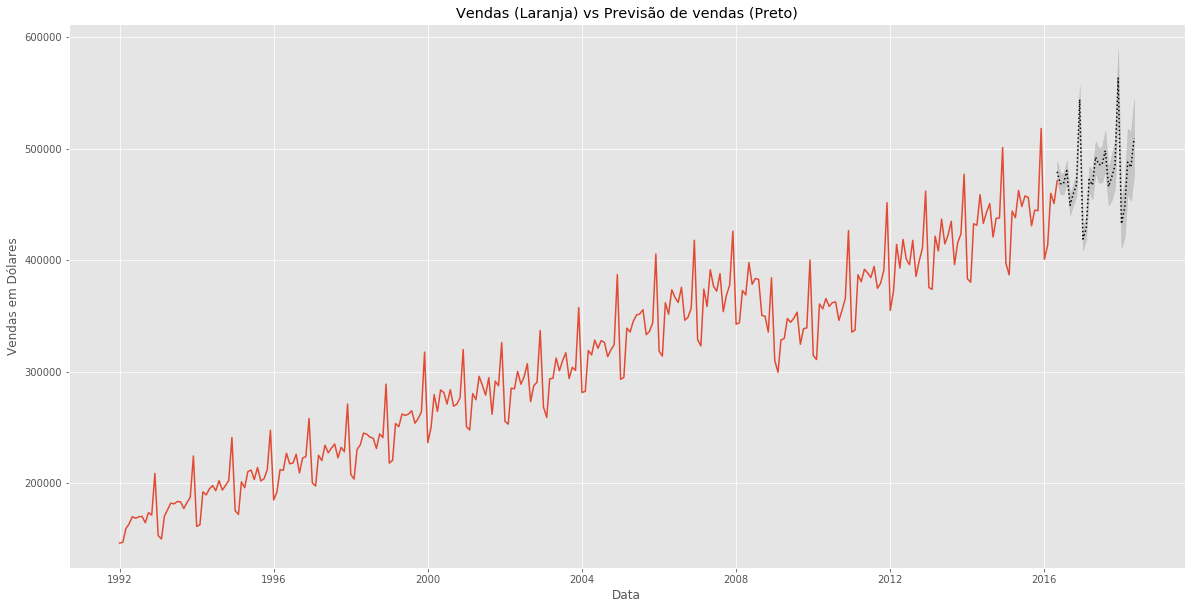

In [57]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.Sales)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Vendas (Laranja) vs Previsão de vendas (Preto)')
ax1.set_ylabel('Vendas em Dólares')
ax1.set_xlabel('Data')

**A previsão realizada pelo modelo reforça a tendência de crescimento das vendas para os próximos meses.Eantretanto, os intervalos de confiança tem momentos em que se elevam rapidamente, isso indica que outros fatores podem levar a uma rápida aumento ou quedas das vendas.**

*O Prophoet se mostrou uma ferramenta de forecasting muito boa.* 